In [1]:
#Import the packages
import ROOT as r
import numpy as np
import math

Welcome to JupyROOT 6.22/00


# Part 0. The datasets
 
 1. **Z to $\mu\mu$ simultion**

We will begin by looking at simulation data corresponding to a Z boson decaying into two muons, which we will be comparing with real CMS data later on after getting familiar with the software.

These simulated datasets correspond to the collision data collected by the CMS experiment in 2012.

First, let's understand what we are looking at.

The dataset name is: 

`/DYToMuMu_M-20_CT10_8TeV-powheg-pythia6/Summer12_DR53X-PU_S10_START53_V19-v1/AODSIM`

The dataset name follows a specific convention to provide a self-explanatory description of the dataset.

It follows a pattern like this:

`/Primary dataset/Condition/Format/`

 - The `Primary dataset` tells you about the process for a simulation dataset, and the data taking period and trigger stream that the data was collected if it is data.

 - The `Condition` part tells you what reconstruction condition has been applied to the dataset.

 - Lastly, the `Format` part tells you the dataformat. We will work with the simplified version of `MINIAOD` format, called `NanoAOD`, which I have prepared for you in advance.**

The dataset is downloaded from here. The files `dy_mc.root`/`dy_mc_small.root` is a tiny fraction of the whole dataset, as we do not need the whole 14TB of events.  
http://opendata.cern.ch/record/7741

 2. **Data - Double Muon data**

We will be using proton-proton collision data at $\sqrt{s}=8 TeV$ taken during 2012 by the CMS.

Of course, we will not be using all of them, the dataset name 

`/DoubleMuParked/Run2012B-22Jan2013-v1/AOD`

tells you with subset of data we will be using.

Here `DoubleMuParked` means the data collected was triggered by a stream of High Level Trigger(HLT) trigger paths that targets muon, such as
```
HLT_DoubleMu5_IsoMu5
```
which means it requires two muons with at least 5 GeV and one of them is isolated from other particles.

Like the simulation data, a skimmed version have been made for you: `Run2012B_DoubleMuParked_nanoaod.root`

More details can be found in this record:
http://opendata.cern.ch/record/6004


<br>
<br>
<br>


** In case you are curious, the conversion is done also with cms open software here:

https://github.com/cms-opendata-analyses/AOD2NanoAODOutreachTool

# Part 1 Exploring ROOT files with pyROOT

In this section, we will go over some of the basic operations to explore a root file, working with the small simulation file first.


In [11]:
#Opening a ROOT file
f = r.TFile("dy_mc_small.root")
# list the content of the file
f.ls()
dir = f.GetDirectory("aod2nanoaod")
dir.ls()

TFile**		Run2012B_DoubleMuParked_nanoaod.root	
 TFile*		Run2012B_DoubleMuParked_nanoaod.root	
  KEY: TDirectoryFile	aod2nanoaod;1	aod2nanoaod
TDirectoryFile*		aod2nanoaod	aod2nanoaod
 KEY: TTree	Events;1	Events


### TTree
TTree is the main object that holds the data. 

In general, all the objects in a TFile can be obtained with the `Get` Method

In [12]:
t = f.Get("aod2nanoaod/Events")

In [13]:
## See how many events are there in this tree
nEntries = t.GetEntries()
print(nEntries)

16922


### TTree.Show()
 There a several methods to see what's inside a tree

`Show(n)` prints out the n-th event in the tree

In [5]:
t.Show(0)

======> EVENT:0
 run             = 1
 luminosityBlock = 155745
 event           = 15574401
 HLT_IsoMu24_eta2p1 = 0
 HLT_IsoMu24     = 0
 HLT_IsoMu17_eta2p1_LooseIsoPFTau20 = 0
 PV_npvs         = 10
 PV_x            = 0.242836
 PV_y            = 0.394151
 PV_z            = 0.156161
 nMuon           = 0
 nElectron       = 0
 nTau            = 1
 Tau_pt          = 15.8333
 Tau_eta         = 2.73775
 Tau_phi         = -0.505689
 Tau_mass        = 4.45695
 Tau_charge      = 0
 Tau_decayMode   = -1
 Tau_relIso_all  = nan
 Tau_jetIdx      = -1
 Tau_genPartIdx  = 0
 Tau_idDecayMode = 0
 Tau_idIsoRaw    = 0
 Tau_idIsoVLoose = 0
 Tau_idIsoLoose  = 0
 Tau_idIsoMedium = 0
 Tau_idIsoTight  = 0
 Tau_idAntiEleLoose = 0
 Tau_idAntiEleMedium = 0
 Tau_idAntiEleTight = 0
 Tau_idAntiMuLoose = 1
 Tau_idAntiMuMedium = 1
 Tau_idAntiMuTight = 1
 MET_pt          = 25.3113
 MET_phi         = -1.33268
 MET_sumet       = 544.79
 MET_significance = 4.06671
 MET_CovXX       = 157.977
 MET_CovXY       = 0.1051
 MET_

### TTree.Print()

`Print()` gives you more information about the branches, esp dataformat. 

Here, `run/I` tells you that the branch `run` is of type integer

whereas, `PV_x/F` means PV_x is a float

Finally, `Muon_pt[nMuon]/F ` is a array of floats

In [6]:
t.Print()

******************************************************************************
*Tree    :Events    : Events                                                 *
*Entries :    12793 : Total =        12552048 bytes  File  Size =    5306422 *
*        :          : Tree compression factor =   2.36                       *
******************************************************************************
*Br    0 :run       : run/I                                                  *
*Entries :    12793 : Total  Size=      51797 bytes  File Size  =        464 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression= 110.59     *
*............................................................................*
*Br    1 :luminosityBlock : luminosityBlock/i                                *
*Entries :    12793 : Total  Size=      51869 bytes  File Size  =        984 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  52.17     *
*...................................................

### Question: Why do we need a different data format for the Muon_pt branch?

### TTree::Draw

Another very handy way to see the data is the `Draw` method.

This is an internal method to loop over all the events on a branch (very efficiently!),

and fill an histogram from the branch content

To visualize the histogram, we first need to create a Canvas.


In [5]:
c = r.TCanvas('c1','c1',800,600)

For example, we can look at the branch called `nMuon`

### Question: Can you guess what does this histogram represents?

The branch names usually contains good description of what does it contain.

Similarly, we can explore another branch called `PV_npvs` as well

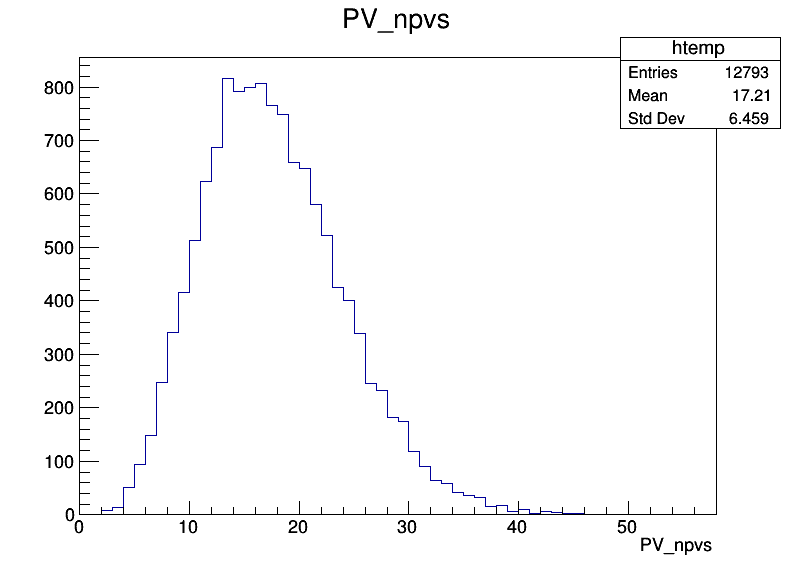

In [9]:
t.Draw("PV_npvs")
c.Draw()

### Question: Can you guess what `PV_npvs` represents then?

### Looping a TTree with a histogram

`TTree.Draw()` can only offer a simple plotting, for more custom analysis, we can go through the `TTree` event-by-event by building a for-loop.

Let's use a simple for-loop to re-create the `nMuon` histogram.

 - Learn how to create a histogram
 - Learn how to write a loop structure for a TTree

### Defining your own 1D histogram

`ROOT` has a very powerful library of histogram class called `TH1` with extensive functionalities.

You can construct a very simple 1D histogram like this:

`h = r.TH1F("name","title", nBin, x_low, x_hi)` 

 - `TH1F` is a sub-class of `TH1`, using a `float` to store the data of each bin of the histogram
 - `name` is the name of the histogram object, it is used to identify the histogram object (h, in this case) in a file
 - `title` is the title to be displayed in plotting
 - `nBin` is the number of bins 
 - `x_low,x_hi` are the lower and upper range of the 1D histogram respectively.
 
 
Further documentation about `TH1` can be found here:
https://root.cern.ch/doc/master/classTH1.html

### Let's define our first histogram

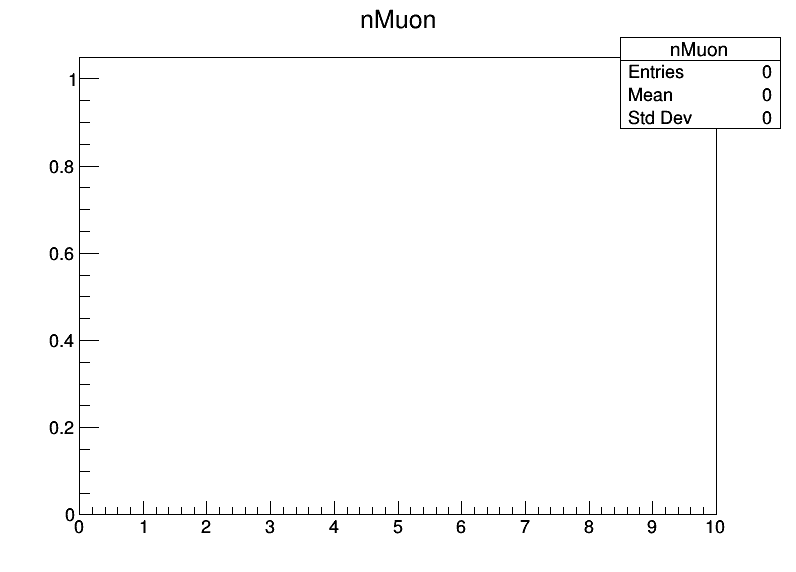

In [10]:
h_nMuon = r.TH1F('nMuon','nMuon',10,0,10)
h_nMuon.Draw()
c.Update()
c.Draw()

### Filling a histogram

Say, if you have an event with 4 muons in it. You will want to put 1 event in the 4-th bin.

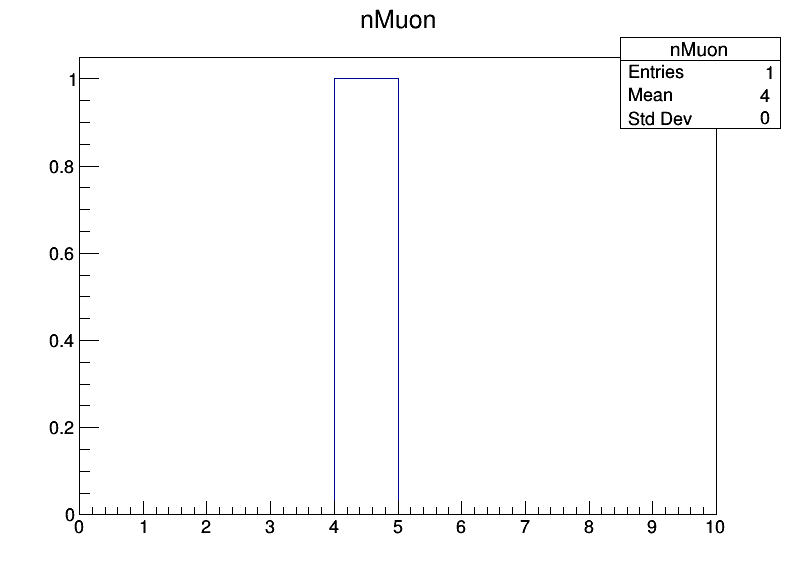

In [11]:
h_nMuon.Fill(4)
c.Update()
c.Draw()

In [12]:
## now let's clear the bin content, by setting the 5th bin to 0
h_nMuon.SetBinContent(5,0)

### Looping a TTree

By default, all the branches are loaded as the methods of the TTree object.

For example, you can simply access the `nMuon` branch like this:

`nMuon = t.nMuon`

**It will return the value of the tree is currently located

To access different events, we can do:

`t.GetEntry(i)`

This will set the memeory address to load the i-th entry in the Tree.

Combining both, a TTree can be looped over with the simple loop structure like this:

```
for i in range(0,t.GetEntries()):
    t.GetEntry(i)
    nMuon = t.nMuon
    h_nMuon.Fill(nMuon)
```

In [13]:
for i in range(0,t.GetEntries()):
    t.GetEntry(i)
    nMuon = t.nMuon
    h_nMuon.Fill(nMuon)

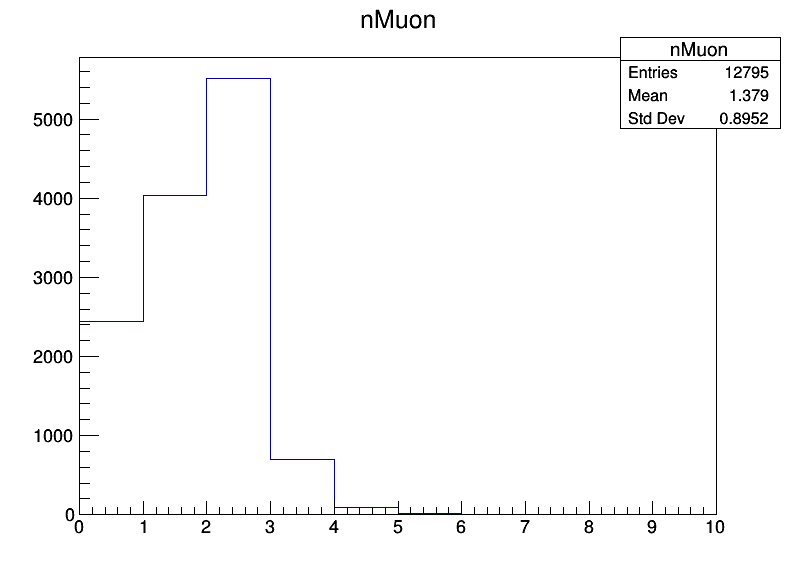

In [14]:
h_nMuon.Draw()
c.Update()
c.Draw()

# Part 3. Plotting the di-muon mass spectrum

Now we have all the ingredients to plot the di-muon mass spectrum.

First, we will need a histogram.

In [15]:
h_dimuon_mass = r.TH1F('DiMuon_mass','DiMuon_mass',200,0,200)
h_dimuon_mass.Sumw2()

You may find the following formulas useful:

Coordinate transformation between pesudeo-rapidity and cartesian coordinates:

$
p_x = p_T cos(\phi)\\
p_y = p_T sin(\phi)\\
p_z = p_T sinh(\eta)
$

Vector additions and Energy-momentum relations:

$
E^2 = |\vec{p}|^2 + m^2\\
\vec{p_1}+\vec{p_2} =  (p1_x+p2_x) \hat{x}+ (p1_y+p2_y) \hat{y}+ (p1_z+p2_z) \hat{z}\\
$

In [16]:
## write a function that computes the invariant mass given the event
## pt, phi, eta, mass are the arrays of the muons in each event
##
def invmass(pt,phi,eta,mass):
    m = 0
    px = pt[0]*np.cos(phi[0])+pt[1]*np.cos(phi[1])
    py = pt[0]*np.sin(phi[0])+pt[1]*np.sin(phi[1])
    theta0 = 2.*np.arctan(np.exp(-eta[0]))
    theta1 = 2.*np.arctan(np.exp(-eta[1]))
    pz = pt[0]/np.tan(theta0) + pt[1]/np.tan(theta1)
    e0 = np.sqrt(pt[0]**2 + (pt[0]/np.tan(theta0))**2 + mass[0]**2)
    e1 = np.sqrt(pt[1]**2 + (pt[1]/np.tan(theta1))**2 + mass[1]**2)
    
    m = np.sqrt((e0+e1)**2 - px**2 - py**2 - pz**2)
    
    ## OR in the massless muon limit, the formula can be more compact:
    #m  = np.sqrt(2*pt[0]*pt[1]*(np.cosh(eta[0]-eta[1])-np.cos(phi[0]-phi[1])))
    return m

In [22]:
## write a function that select 
def selectMuons(muons):
    select = False
    if muons['n']==2:        select = True
    return select

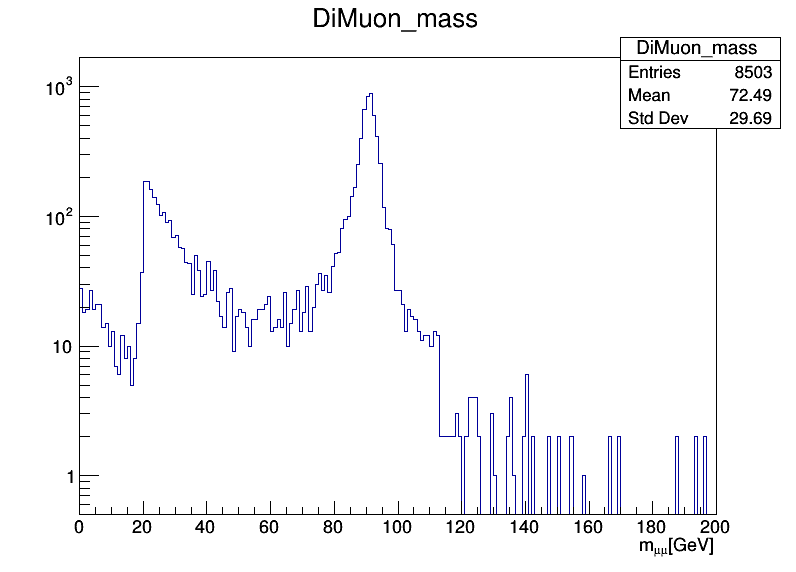

In [23]:
for i in range(0,nEntries):
    t.GetEntry(i)
    nMuon   = t.nMuon
    pt      = np.array(t.Muon_pt)          # note: this is an array
    phi     = np.array(t.Muon_phi)         # note: this is an array
    eta     = np.array(t.Muon_eta)         # note: this is an array 
    mass    = np.array(t.Muon_mass)        # note: this is an array
    isTight = np.array(t.Muon_tightId)     # note: this is an array
    charge  = np.array(t.Muon_charge)      # note: this is an array
    muons   = {
        'n':nMuon,
        'pt':pt,
        'phi':phi,
        'eta':eta,
        'isTight':isTight,
        'charge':charge,
    }
    if selectMuons(muons):
        h_dimuon_mass.Fill(invmass(pt,phi,eta,mass))
        
h_dimuon_mass.Draw('hist')
h_dimuon_mass.GetXaxis().SetTitle('m_{#mu#mu}[GeV]')
c.Update()
c.SetLogy(1)
c.Draw()

### RESET the histogram if you want to try again!

In [99]:
for i in range(0,201): h_dimuon_mass.SetBinContent(i,0)

# Part 3 Extracting the Z-boson mass

Let's try to extract the Z-boson mass by fitting the peak with a Gaussian function.

Mathematical functions in ROOT can be constructed with the class `TF1`*
Gaussian function is one of the built-in function in ROOT with the following form:

$f(x) = [0] exp\left(-\frac{1}{2}((x-[1])/[2]\right)^2$

Here `[0],[1],[2]` are the parameters of the function, corresponding to the `amplitude`, `mean` and `width` of the Gaussian function.

Let's create a gaussian function, initialize it with some values, and draw it.

* Full documentation of the `TF1` class
https://root.cern.ch/doc/master/classTF1.html

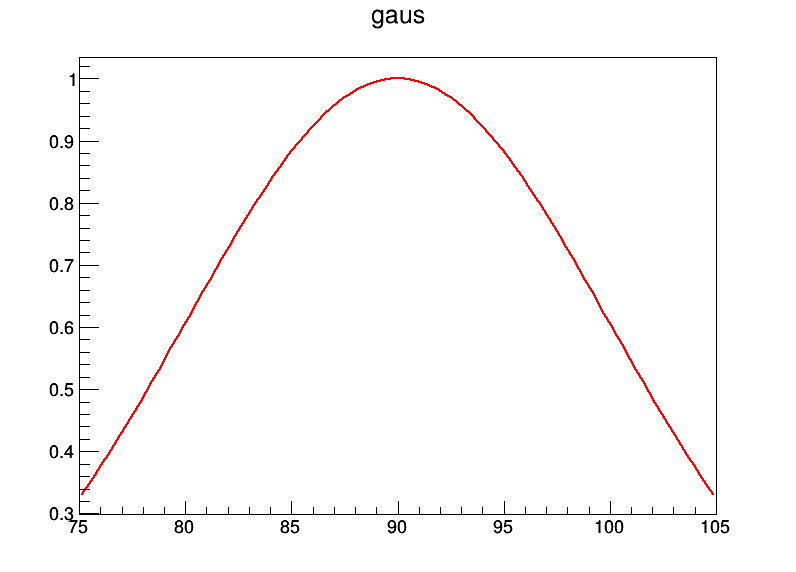

In [24]:
## Here, 'f1' is the name of the object, 
## 'gaus' is a special string that corresponds to the gaussian formula above
## 85 and 95 is the range of the function.
## i.e. we are insterested only in that mass window.
gaus = r.TF1('f1','gaus',75,105)
gaus.SetParameters(1,90,10)
gaus.Draw()
c.SetLogy(0)
c.Draw()

`TH1` has basic fit function implemented.

The default option is the least square fit, 

$
\chi^2 = \sum \left((y_i - f(x_i) )/e_i \right)^2
$

The option `R` tells the fit to restrict to the range defined by the function

The options `S` simply return the fit result as an object instead of just print-outs.

The full options can be found here:

https://root.cern.ch/doc/master/classTH1.html#a63eb028df86bc86c8e20c989eb23fb2a

In [30]:
fitResult = h_dimuon_mass.Fit(gaus,'RS')

 FCN=751.036 FROM MIGRAD    STATUS=CONVERGED      89 CALLS          90 TOTAL
                     EDM=7.05961e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.99743e+02   1.69184e+01   1.34272e-01   2.14013e-05
   2  Mean         9.08432e+01   4.11189e-02   5.32781e-04  -4.32965e-03
   3  Sigma        2.77650e+00   5.40462e-02   4.03131e-05   9.77698e-02


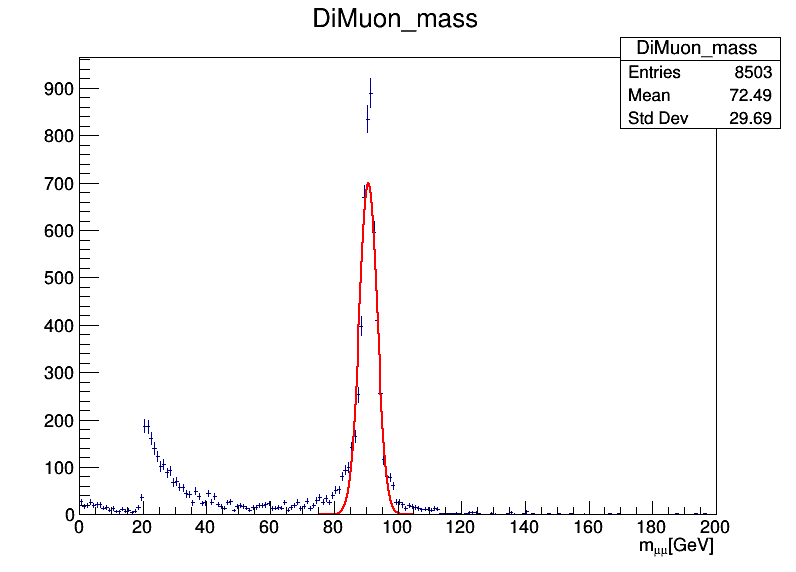

In [31]:
h_dimuon_mass.Draw()
c.Draw()

### Part 3a Quality of the fit

In [27]:
chi2 = gaus.GetChisquare()
NDF  = gaus.GetNDF()
print('Checking fit quality:')
print("chi2 = %.3f\nNDF = %.3f\nchi2/NDF = %.3f"% (chi2,NDF, chi2/NDF))

Checking fit quality:
chi2 = 751.036
NDF = 27.000
chi2/NDF = 27.816


## Questions:
- How does the width of the Gaussian (calculate the full width at half maximum from sigma) compares with the known intrinsic width of the Z boson?


In [35]:
FWHM = 2*(2*math.log(2))**0.5 * gaus.GetParameter('Sigma')
print(FWHM)

6.5381643516


## ANS:
 - The width you obtained is much bigger than the intrinsic width of the Z boson.
 - The reason can be attributed to:
   - poor fit qualities (There are background events un-accounted for in the fit)
   - Bin width (1GeV) is wider than detector resolution 
   - Fit window is too wide to accept background events
 - The current best fit value for Z boson width is `2.4952±0.0023` GeV*. This is a very precise measurement!
 - Width of Z boson has profound physics implication! For example, by comparing the width of the Z boson and measuring the branching ratios of all the decay modes, we can deduce if Z boson is having extra-undetected decay modes. This has put a very tight constain with the number of lepton generations that couples to the Z boson. 

*http://pdg.lbl.gov/2018/listings/rpp2018-list-z-boson.pdf

# Part 4 Take-home exercise

# Part 4a Knowing more about the muons

Now we have the basic tools to explore a ROOT file and analysis. Let's learn deeper about the muons!

Here are some questions to think about:

- plot muon pT for the leading, subleading, and third-leading muon (when it's there) and explain the features seen in the plot;
- plot muon eta for the leading and subleading muons and explain the feature seen in the plot;
- plot isTight flag for the three muons;
- plot the muon multiplicity for isTight muons;

These questions can be solved in a similar way as the `nMuon` example, with the addition of some control statements during the histogram filling.

### Hint: all the `Muon_*` branch has already been sorted in decending order of `pt` 
i.e `Muon_pt[0]` corresponds to the pt of the leading muon, `Muon_eta[0]` would be the $\eta$ of the same muon


To help you get started, let's define some histograms for you.

In [15]:
## Define the histograms
h_mu0_pt      = r.TH1F('h_mu0_pt'     ,'Leading muon pt',200,0,200)
h_mu0_eta     = r.TH1F('h_mu0_eta'    ,'Leading muon eta',100,-5,5)
h_mu0_isTight = r.TH1F('h_mu0_isTight','Leading muon isTight',2,0,2)

h_mu1_pt      = r.TH1F('h_mu1_pt'  ,'Sub-leading muon pt',200,0,200)
h_mu1_eta     = r.TH1F('h_mu1_eta' ,'Sub-leading muon eta',100,-5,5)
h_mu1_isTight = r.TH1F('h_mu1_isTight','Sub-leading muon isTight',2,0,2)

h_mu2_pt      = r.TH1F('h_mu2_pt','Third-Leading muon pt',200,0,200)
h_mu2_isTight = r.TH1F('h_mu2_isTight','Third-leading muon isTight',2,0,2)

h_nTightMuon  = r.TH1F('h_nTightMuon','Number of tight muons',10,0,10)

#collect the histograms into a dic
histograms = {
        'h_mu0_pt'     :h_mu0_pt,
        'h_mu0_eta'    :h_mu0_eta,
        'h_mu0_isTight':h_mu0_isTight,
        'h_mu1_pt'     :h_mu1_pt,
        'h_mu1_eta'    :h_mu1_eta,
        'h_mu1_isTight':h_mu1_isTight,
        'h_mu2_pt'     :h_mu2_pt,
        'h_mu2_isTight':h_mu2_isTight,
        'h_nTightMuon' :h_nTightMuon,
}

In [16]:
for i in range(0,nEntries):
    t.GetEntry(i)
    nMuon   = t.nMuon
    pt      = np.array(t.Muon_pt)          # note: this is an array
    phi     = np.array(t.Muon_phi)         # note: this is an array
    eta     = np.array(t.Muon_eta)         # note: this is an array 
    mass    = np.array(t.Muon_mass)        # note: this is an array
    isTight = np.array(t.Muon_tightId)     # note: this is an array
    charge  = np.array(t.Muon_charge)      # note: this is an array
    muons   = {
        'n':nMuon,
        'pt':pt,
        'phi':phi,
        'eta':eta,
        'isTight':isTight,
        'charge':charge,
    }
    if nMuon==2 and muons['pt'][0]>20:    
        h_mu0_pt.Fill(pt[0])
        h_mu0_eta.Fill(eta[0])
        h_mu0_isTight.Fill(isTight[0])
        h_mu1_pt.Fill(pt[1])
        h_mu1_eta.Fill(eta[1])
        h_mu1_isTight.Fill(isTight[1])
    if nMuon>=3:
        h_mu2_pt.Fill(pt[2])
        h_mu2_isTight.Fill(isTight[2])
    nTight = 0
    for i in range(0,nMuon):
        if isTight[0]: nTight+=1
    h_nTightMuon.Fill(nTight)

### Drawing the muon pT histograms

You can execute the following cells to check the histograms

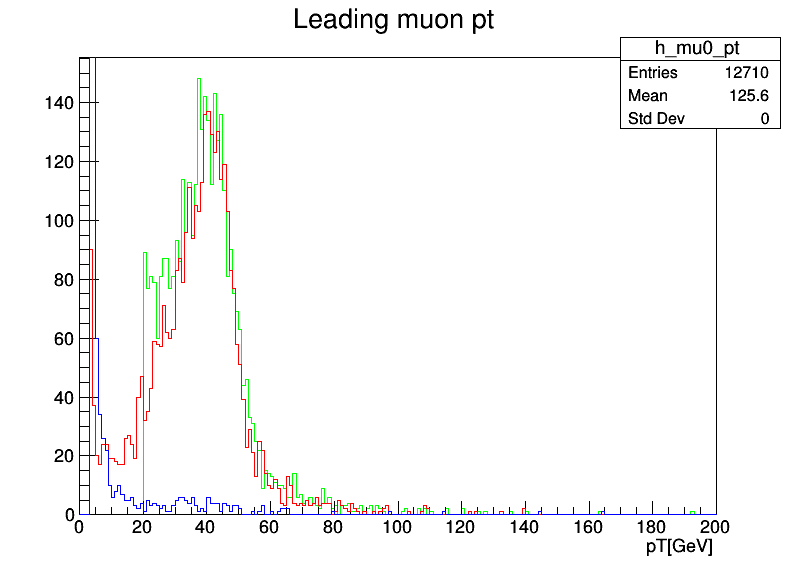

In [26]:
h_mu0_pt.SetLineColor(r.kGreen)   ## r.kRed is a global constant stored in ROOT, corresponding to the color code
h_mu1_pt.SetLineColor(r.kRed)     ## r.kRed is a global constant stored in ROOT, corresponding to the color code
h_mu2_pt.SetLineColor(r.kBlue)
h_mu0_pt.Draw()
h_mu1_pt.Draw('same')             ## the "same" option overlays the histograms on the same canvas
h_mu2_pt.Draw('same')
h_mu0_pt.GetXaxis().SetTitle('pT[GeV]')
c.Update()
c.Draw()

### Question: What do you observe? Can you understand the distribution?

 - You can clearly see the leading muon and sub-leading muon has very similar pT distribution. This makes sense becuase they come from the a 2-body decay of a Z-boson, in which energy of the Z-boson is shared among the 2 muons.
 - The 3-rd muon in the event has a much softer pT spectrum (i.e. lower pT), simply because they are not decay products of a very massive Z-boson. They are, for example, muons from the hadrons decay inside the jets from pile-up.

### Drawing the muon eta histograms

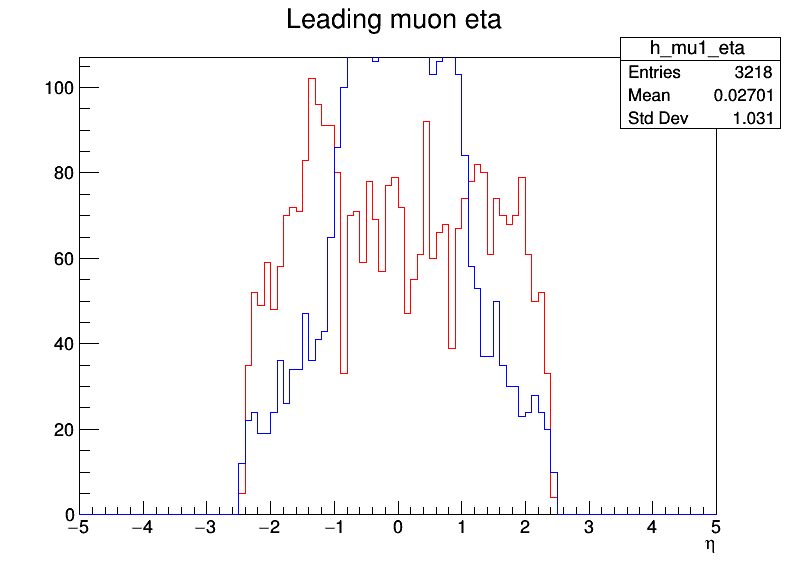

In [18]:
h_mu0_eta.Draw()
h_mu0_eta.SetLineColor(r.kRed)     ## r.kRed is a global constant stored in ROOT, corresponding to the color code
h_mu1_eta.SetLineColor(r.kBlue)
h_mu1_eta.Draw('same')             ## the "same" option overlays the histograms on the same canvas
h_mu0_eta.GetXaxis().SetTitle('#eta')
c.Update()
c.Draw()

### Drawing isTight histograms

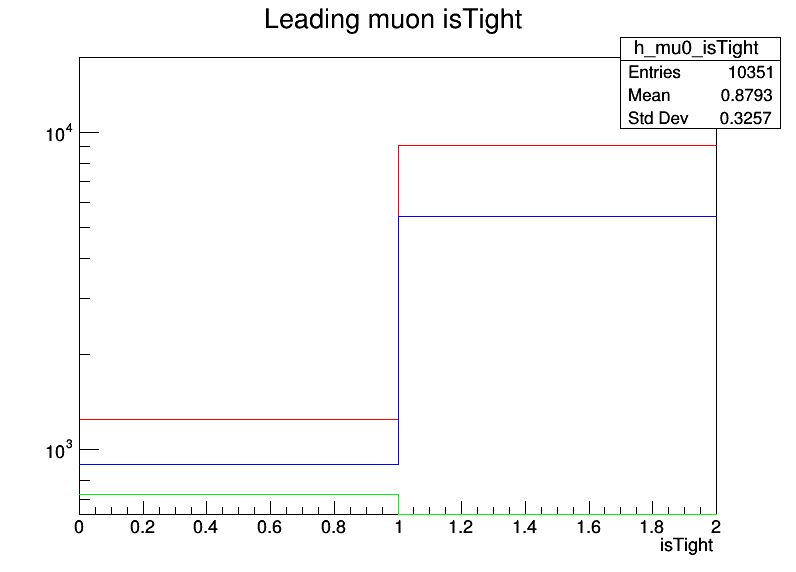

In [38]:
h_mu0_isTight.Draw()
h_mu0_isTight.SetLineColor(r.kRed)     ## r.kRed is a global constant stored in ROOT, corresponding to the color code
h_mu1_isTight.SetLineColor(r.kBlue)
h_mu2_isTight.SetLineColor(r.kGreen)
h_mu1_isTight.Draw('same')             ## the "same" option overlays the histograms on the same canvas
h_mu2_isTight.Draw('same')             ## the "same" option overlays the histograms on the same canvas
h_mu0_isTight.GetXaxis().SetTitle('isTight')
c.Update()
c.SetLogy(1)
c.Draw()

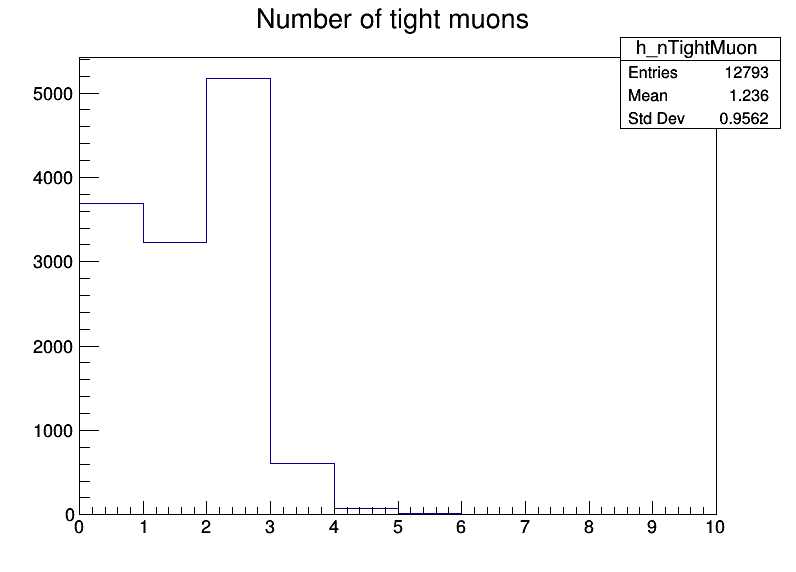

In [39]:
h_nTightMuon.Draw()
c.SetLogy(0)
c.Update()
c.Draw()

### Remember to reset the histograms if you want to re-fill them!

In [24]:
for hname,h in histograms.items():
    for b in range(0,h.GetNbinsX()):
        h.SetBinContent(b,0)

# Part 4b Di-muon selections:
 - Can we increase the number of events by using events with exactly two isTight muons, not exactly two muons?
   - Try modifying the `selectMuon` function to test your ideas!
 - histogram the product of electric charges for the events with two tight muons; How often do we have same-sign muons?

In [41]:
def selectGoodMuons(muons):
    select = False
    if muons['n']==2 and np.all(muons['isTight']) and muons['charge'][0]*muons['charge'][1]<0 and muons['pt'][0]>20:
        select = True
    return select

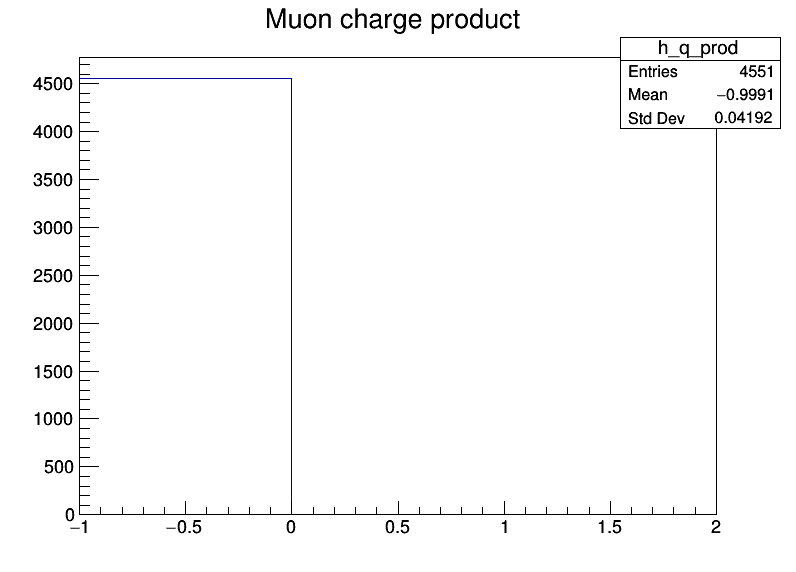

In [40]:
## same-signed muons
h_q_prod = r.TH1F('h_q_prod','Muon charge product',3,-1,2)
for i in range(0,nEntries):
    t.GetEntry(i)
    if t.nMuon==2 and t.Muon_tightId[0]==1 and t.Muon_tightId[1]==1:
        h_q_prod.Fill(t.Muon_charge[0]*t.Muon_charge[1])
h_q_prod.Draw()
c.Update()
c.Draw()

# Part 4c Z-boson decays

Now that you have observe a Z boson, you do more in-depth analysis of those events coming from a Z boson decay.

- For events within an invariant mass window near the Z peak, plot pT spectrum of the Z boson.
- For these events, plot a correlation (2D histogram) of the opening azimuthal angle (phi) between the two muons and the pT of the Z boson.

You can use the following histograms:

In [42]:
h_pT_z    = r.TH1F('pT_z','pT of Z boson',100,0,100)
h_pTz_phi = r.TH2F('pTz_phi','pT of Z boson v.s. #Delta#phi(#mu#mu)',100,0,100,50,0,math.pi)

In [43]:
# We need to be careful when we calculate azimuthal angle difference, since computers do not know 2pi+phi = phi
# so we need to have a function that returns deltaPhi to within 0 to pi
def deltaPhi(phi1, phi2):
    x = np.abs(phi1 - phi2)
    if x >=  math.pi: 
        x = 2.*math.pi - x
    return x

In [44]:
for i in range(0,nEntries):
    t.GetEntry(i)
    nMuon   = t.nMuon
    pt      = np.array(t.Muon_pt)          # note: this is an array
    phi     = np.array(t.Muon_phi)         # note: this is an array
    eta     = np.array(t.Muon_eta)         # note: this is an array 
    mass    = np.array(t.Muon_mass)        # note: this is an array
    isTight = np.array(t.Muon_tightId)     # note: this is an array
    charge  = np.array(t.Muon_charge)      # note: this is an array
    muons   = {
        'n':nMuon,
        'pt':pt,
        'phi':phi,
        'eta':eta,
        'isTight':isTight,
        'charge':charge,
    }
    if selectMuons(muons):
        m_mumu = invmass(pt,phi,eta,mass)
        if m_mumu >89 and m_mumu<93:
            px = pt[0]*np.cos(phi[0])+pt[1]*np.cos(phi[1])
            py = pt[0]*np.sin(phi[0])+pt[1]*np.sin(phi[1])
            pt_z = (px**2+py**2)**0.5
            delta_phi = deltaPhi(phi[0],phi[1])
            h_pT_z.Fill(pt_z)
            h_pTz_phi.Fill(pt_z,delta_phi) 

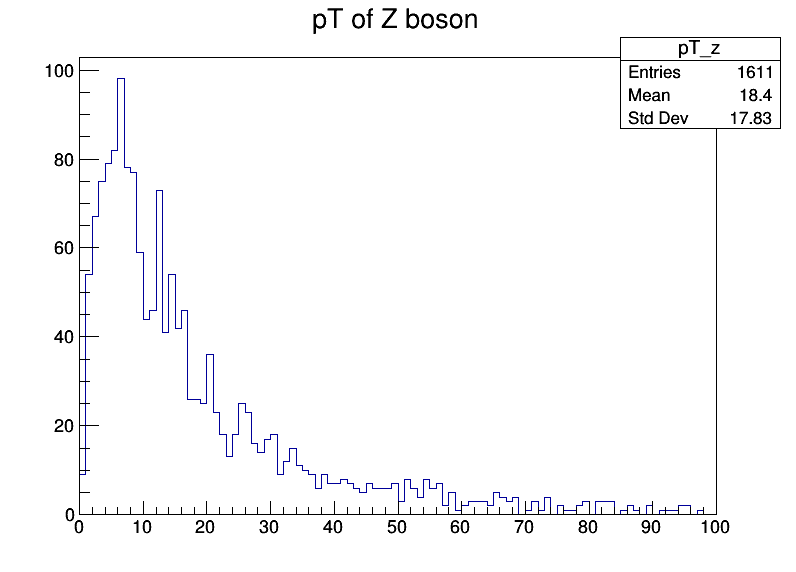

In [45]:
h_pT_z.Draw()
c.Update()
c.Draw()

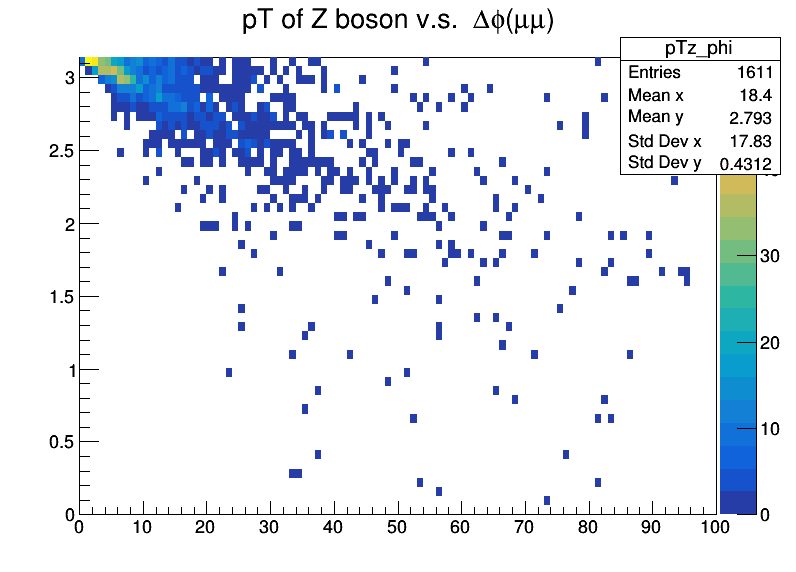

In [46]:
h_pTz_phi.Draw('COLZ')
c.Update()
c.Draw()

# Part 4d Improving fit quality

- Modify the fit to have a sum of a Gaussian and an exponent to describe the background under the peak 
- Does this improve the fit chi2?
- Can you think of other ways to improve the fit quality?

You may want to read the `TF1` documentation to think of which functions to use!

Here are some skeleton code for you to use:

In [47]:
## Define the sum of gaussian and exponential:
f2 = r.TF1('f2','gaus(0)+expo(3)',75,105)
print(f2.GetFormula().GetExpFormula()) 
f2.SetParameters(1,90,10,6,-0.02)

[p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))+exp([p3]+[p4]*x)


In [48]:
## ADD your fitting code here:
fitResult = h_dimuon_mass.Fit(f2,'RS')

 FCN=222.768 FROM MIGRAD    STATUS=CONVERGED     307 CALLS         308 TOTAL
                     EDM=9.57021e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.52620e+02   1.67563e+01  -4.48938e-03   4.05709e-08
   2  p1           9.09204e+01   3.92270e-02   3.31470e-06   2.40169e-04
   3  p2           2.34469e+00   4.34502e-02   2.18331e-05  -2.40812e-04
   4  p3           5.48949e+00   2.98872e-01  -6.52326e-05   1.58055e-04
   5  p4          -2.25256e-02   3.43054e-03   1.20555e-06   3.00455e-02


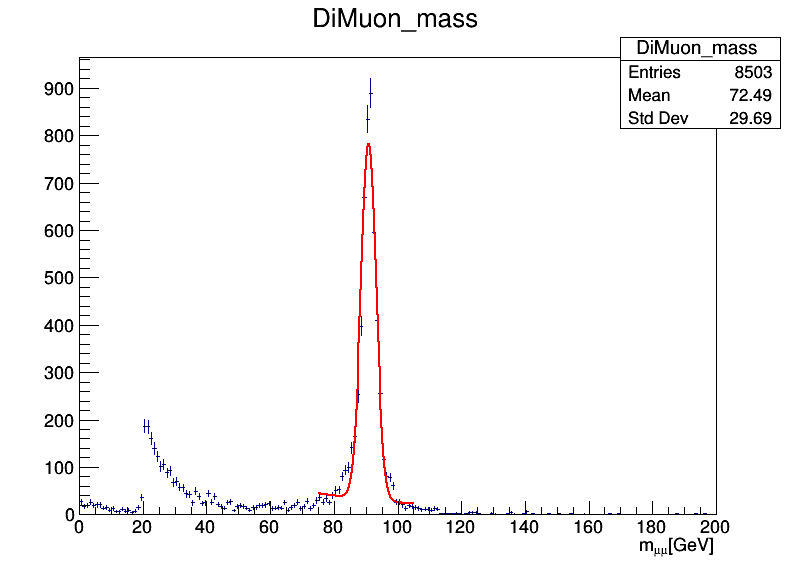

In [49]:
h_dimuon_mass.Draw()
c.Update()
c.Draw()

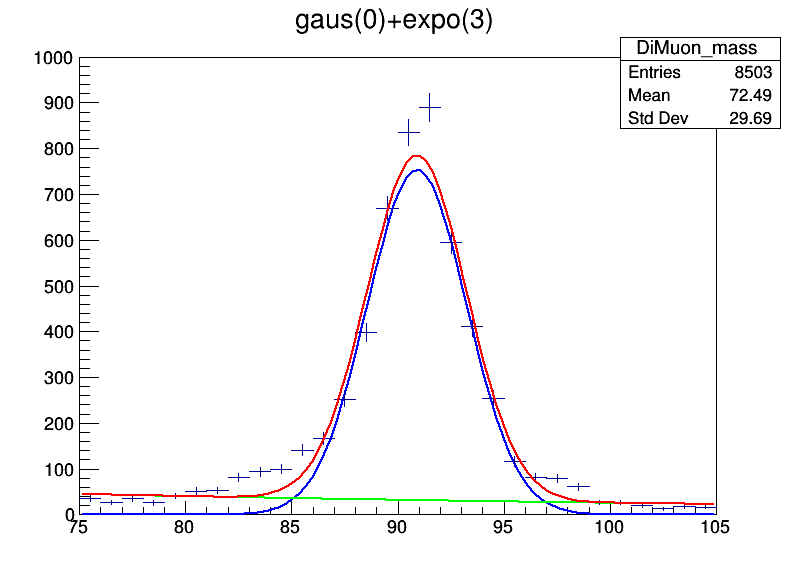

In [50]:
h_data = h_dimuon_mass.Clone()
f2_gaus = r.TF1('f2_gaus','gaus(0)',75,105)
f2_expo = r.TF1('f2_expo','expo(0)',75,105)
for i in range(0,3): f2_gaus.SetParameter(i,f2.GetParameter(i))
for i in range(3,5): f2_expo.SetParameter(i-3,f2.GetParameter(i))
f2.Draw()
f2_gaus.SetLineColor(r.kBlue)
f2_expo.SetLineColor(r.kGreen)
f2_gaus.Draw('same')
f2_expo.Draw('same')
h_data.Draw('same E')
f2.GetYaxis().SetRangeUser(0,1000)
c.Update()
c.SetLogy(0)
c.Draw()

In [51]:
## Now check your fit quality. Does it improve?
chi2 = f2.GetChisquare()
NDF  = f2.GetNDF()
print('Checking fit quality:')
print("chi2 = %.3f\nNDF = %.3f\nchi2/NDF = %.3f"% (chi2,NDF, chi2/NDF))

Checking fit quality:
chi2 = 222.768
NDF = 25.000
chi2/NDF = 8.911
